In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [15]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

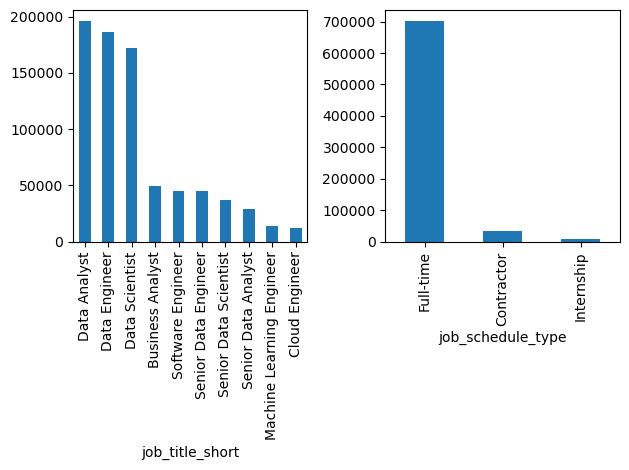

In [18]:
fig, ax = plt.subplots(1, 2)
df['job_title_short'].value_counts().plot(kind = 'bar', ax = ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind = 'bar', ax = ax[1])
fig.tight_layout()

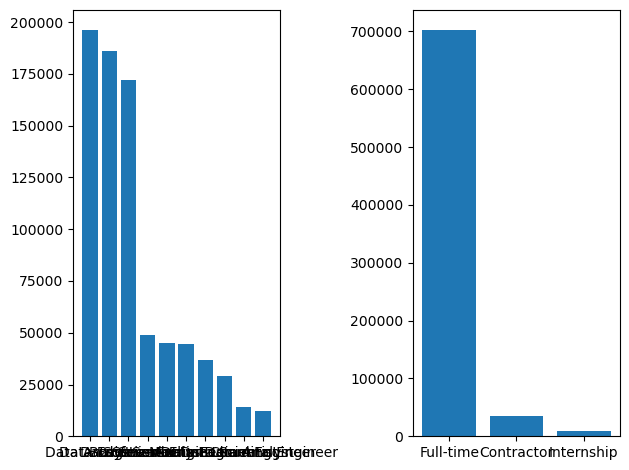

In [20]:
fig, ax = plt.subplots(1, 2)
ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))
fig.tight_layout()

In [21]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count.sort_values(by='skill_count', ascending = False, inplace = True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [34]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

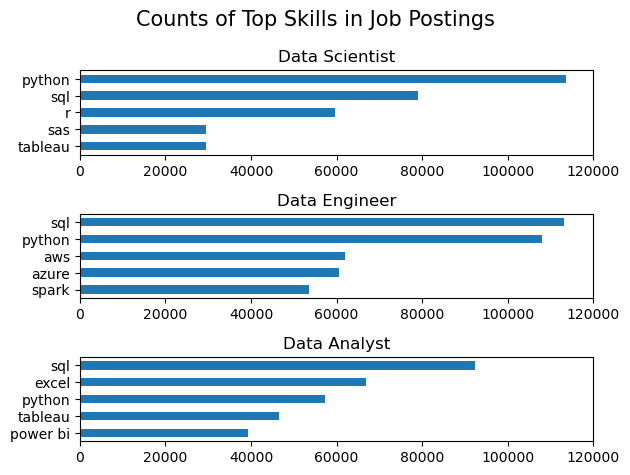

In [44]:
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skill_count', ax = ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)


fig.suptitle('Counts of Top Skills in Job Postings', fontsize = 15)
fig.tight_layout()

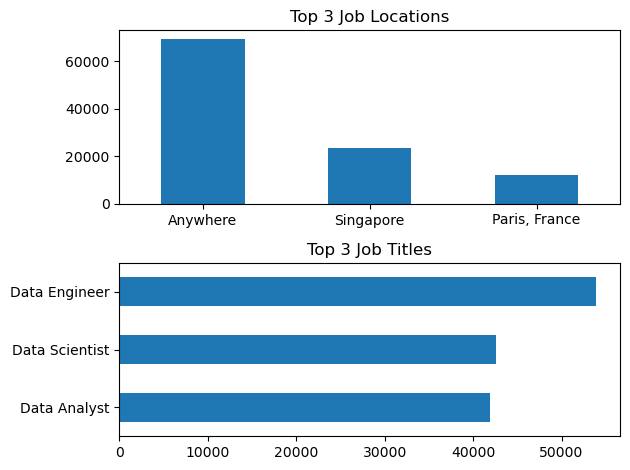

In [57]:
fig, ax = plt.subplots(2,1)
df_location = df.copy()
df_location['job_location']. value_counts().head(3).plot(kind = 'bar', ax = ax[0])
df['job_title']. value_counts().head(3).plot(kind = 'barh', ax = ax[1])
ax[1].invert_yaxis()
ax[0].set_title('Top 3 Job Locations')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].tick_params(rotation=0)

ax[1].set_title('Top 3 Job Titles')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
fig.tight_layout()


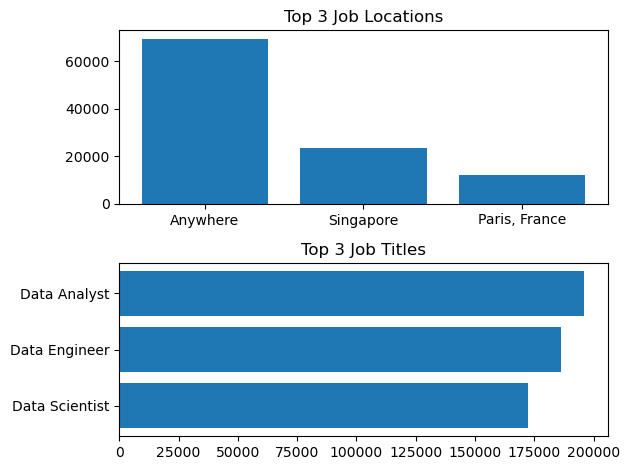

In [58]:
fig, ax = plt.subplots(2, 1)

# Top 3 job locations
job_locations = df['job_location'].value_counts().head(3)
ax[0].bar(job_locations.index, job_locations.values)
ax[0].set_title('Top 3 Job Locations')

# Top 3 job titles
job_titles = df['job_title_short'].value_counts().head(3)
ax[1].barh(job_titles.index, job_titles.values)
ax[1].set_title('Top 3 Job Titles')
ax[1].invert_yaxis()

fig.tight_layout()
plt.show()

In [62]:
df.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [68]:
df_schedule = df.copy()
df_schedule = df_schedule.explode('job_schedule_type')
schedule_count = df_schedule.groupby(['job_schedule_type', 'job_title_short']).size()
df_schedule_count = schedule_count.reset_index(name = 'schedule_count')
df_schedule_count.sort_values(by='schedule_count', ascending = False, inplace = True)

df_schedule_count

,job_schedule_type,job_title_short,schedule_count
38,Full-time,Data Analyst,168975
39,Full-time,Data Engineer,165225
40,Full-time,Data Scientist,153278
36,Full-time,Business Analyst,44106
45,Full-time,Software Engineer,42314
...,...,...,...
185,Part-time and Contractor,Senior Data Scientist,1
183,Part-time and Contractor,Senior Data Analyst,1
182,Part-time and Contractor,Machine Learning Engineer,1
101,"Full-time, Contractor, and Temp work",Cloud Engineer,1


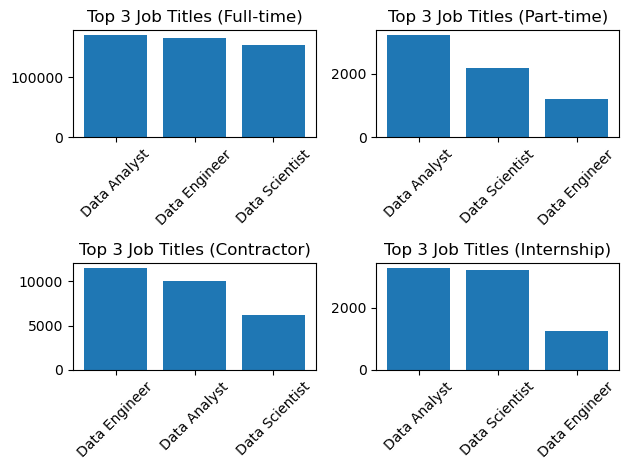

In [76]:
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']
fig, ax = plt.subplots(2,2)

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')
    ax[i//2, i%2].tick_params(axis = 'x', rotation=45)
    ax[i//2, i%2].set_xlabel('')


fig.tight_layout()
plt.show()


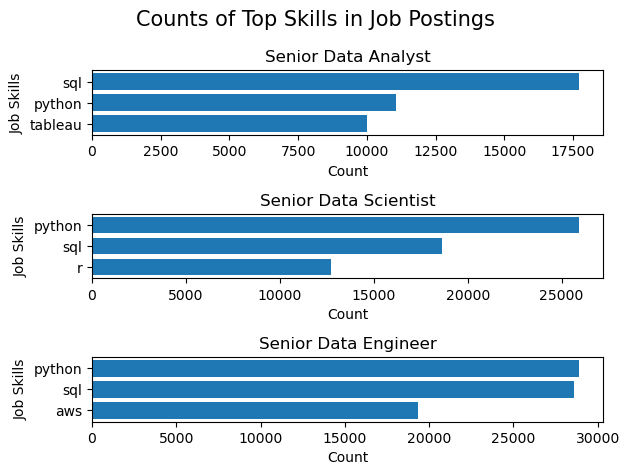

In [80]:
roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count.sort_values(by='skill_count', ascending = False, inplace = True)
fig, ax = plt.subplots(3,1)

for i, role in enumerate(roles):
    role_skills = df_skills[df_skills['job_title_short'] == role]['job_skills'].value_counts().head(3)
    ax[i].barh(role_skills.index, role_skills.values)
    ax[i].set_title(role)
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('Job Skills')
    ax[i].invert_yaxis()


fig.suptitle('Counts of Top Skills in Job Postings', fontsize = 15)
fig.tight_layout()